In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(patchwork)))
suppressPackageStartupMessages(suppressWarnings(library(cowplot)))
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML)))
suppressPackageStartupMessages(suppressWarnings(library(pheatmap)))
suppressPackageStartupMessages(suppressWarnings(library(lattice)))
suppressPackageStartupMessages(suppressWarnings(library("RColorBrewer")))
suppressPackageStartupMessages(suppressWarnings(library(gplots)))
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap)))
suppressPackageStartupMessages(suppressWarnings(library(ggplotify)))
suppressPackageStartupMessages(suppressWarnings(library(arrow)))

# insall ggmagnify from hughjonesd's universe
install.packages("ggmagnify", repos = c("https://hughjonesd.r-universe.dev", 
                 "https://cloud.r-project.org"))
suppressPackageStartupMessages(suppressWarnings(library(ggmagnify)))
source("../utils/figure_themes.r")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Generate each individual plot priot to combining them in a single figure (pathwork)

In [2]:
# Load in the treatment list
toml_path <- file.path("..","..","1.Exploratory_Data_Analysis/utils/params.toml")
p <- parseTOML(toml_path)
# get the list that is in the toml file under the key "treatments"
# define that list as a variable called list_of_treatments and print the list to verify
list_of_treatments <- c(p$list_of_treatments$treatments)
list_of_treatments


[1] "DMSO_0.100_%_DMSO_0.025_%"                           
 [2] "Thapsigargin_1.000_uM_DMSO_0.025_%"                  
 [3] "Thapsigargin_10.000_uM_DMSO_0.025_%"                 
 [4] "H2O2_100.000_uM_DMSO_0.025_%"                        
 [5] "H2O2_100.000_nM_DMSO_0.025_%"                        
 [6] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"              
 [7] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"              
 [8] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                    
 [9] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                    
[10] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                    
[11] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                   
[12] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                  
[13] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%" 
[14] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%" 
[15] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"

In [3]:
# Figure 2A

# Load data
data_path_cytokine_values <- file.path("../../2.Nomic_nELISA_Analysis/Data/clean/Plate2/nELISA_plate_430420_PBMC_clean.parquet")
cytokine_values <- arrow::read_parquet(data_path_cytokine_values)
# filter out the treatments that are not in the list
cytokine_values <- cytokine_values[cytokine_values$oneb_Treatment_Dose_Inhibitor_Dose %in% list_of_treatments,]


In [4]:
# convert to a dataframe
cytokine_values <- as.data.frame(cytokine_values)
head(cytokine_values)


,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,⋯,VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Treatment,Dose,oneb_Treatment_Dose_Inhibitor_Dose,twob_Treatment_Dose_Inhibitor_Dose,threeb_Treatment_Dose_Inhibitor_Dose,fourb_Treatment_Dose_Inhibitor_Dose
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,70117_20230210MM1_P1,430420,B06,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.2588339,0.2383579,0.5242758,0.25067049,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030
2,70117_20230210MM1_P1,430420,C06,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.3811698,0.1686448,0.4550923,0.22875231,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030
3,70117_20230210MM1_P1,430420,I06,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.1829557,0.2632805,0.2135963,0.06464467,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030
4,70117_20230210MM1_P1,430420,J06,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.5820531,0.0875655,0.1409924,0.23419108,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030
5,70117_20230210MM1_P1,430420,B07,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.2641405,0.2967816,0.5416893,0.16707815,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030
6,70117_20230210MM1_P1,430420,C07,PBMC,6_h,DMSO,0.025,%,0.030,DMSO,⋯,0.7655692,0.2178902,0.5684098,0.24460178,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030


In [5]:
# mutate the names of each treatment
cytokine_values <- cytokine_values %>%
    mutate(oneb_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Treatment_Dose_Inhibitor_Dose == "DMSO_0.100_%_DMSO_0.025_%" ~ "DMSO 0.1%",
        oneb_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.025_%" ~ "Flagellin 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM"
    ))


In [6]:
treatment_order <- c(
    'DMSO 0.1%',
    'Flagellin 0.1 ug/ml',
    'Flagellin 1.0 ug/ml',
    'LPS 0.01 ug/ml',
    'LPS 0.1 ug/ml',
    'LPS 1.0 ug/ml',
    'LPS 10.0 ug/ml',
    'LPS 100.0 ug/ml',
    'LPS 1.0 ug/ml + Nigericin 1.0 uM',
    'LPS 1.0 ug/ml + Nigericin 3.0 uM',
    'LPS 1.0 ug/ml + Nigericin 10.0 uM',
    'H2O2 100.0 nM',
    'H2O2 100.0 uM',
    'Thapsigargin 1.0 uM',
    'Thapsigargin 10.0 uM'
)
cytokine_values$oneb_Treatment_Dose_Inhibitor_Dose <- factor(cytokine_values$oneb_Treatment_Dose_Inhibitor_Dose, levels = treatment_order)


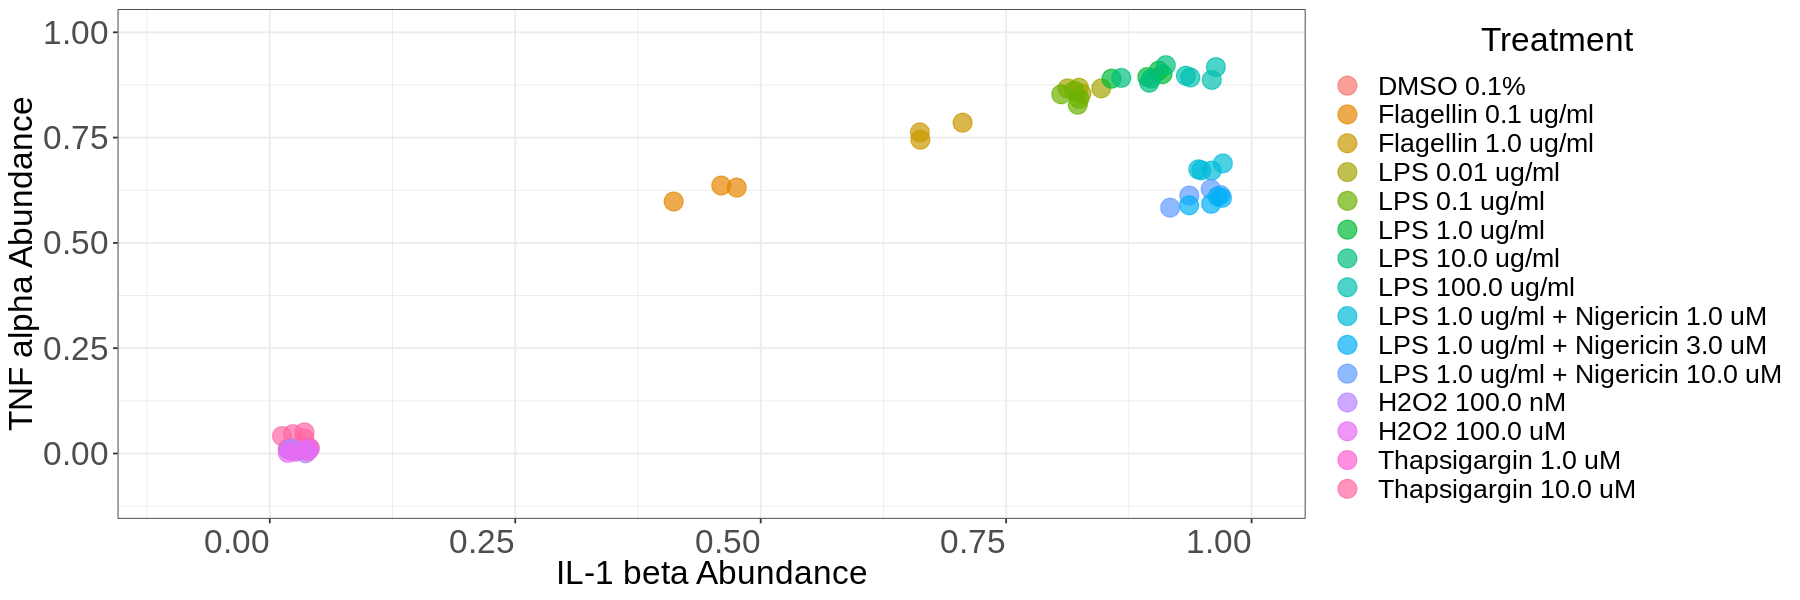

In [7]:
# set plot size
options(repr.plot.width=15, repr.plot.height=5)
# Plot
cytokine_scatter_plot <- (
    ggplot(
        data = cytokine_values,
        aes(
            x = `IL-1 beta [NSU]`,
            y = `TNF alpha [NSU]`,
            color = oneb_Treatment_Dose_Inhibitor_Dose
        )
    )
    + geom_point(size = 5, alpha = 0.7)
    + theme_bw()
    + xlab("IL-1 beta Abundance")
    + ylab("TNF alpha Abundance")
    + xlim(-0.1, 1)
    + ylim(-0.1, 1)
    # rename legend title
    + labs(color = "Treatment", hjust = 0.5)
    + figure_theme
        + theme(axis.text.x = element_text( vjust = 0.5, hjust=1))
        + theme(
         legend.text = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5))

)

cytokine_scatter_plot


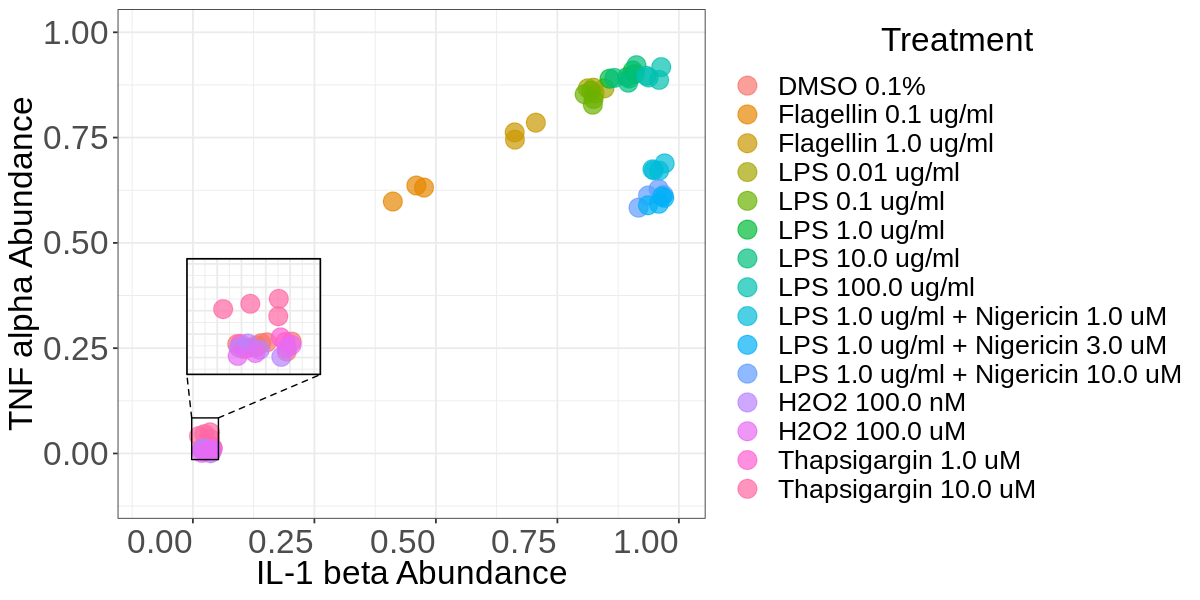

In [8]:
# set plot size
options(repr.plot.width=10, repr.plot.height=5)
# cytokine_scatter_plot
from <- list(0, 0.05, -0.01, 0.08) #xmin, xmax, ymin, ymax
to <- list(0, 0.25, 0.2, 0.45)
cytokine_scatter_plot <- cytokine_scatter_plot + geom_magnify(# allow for small coordinates
    from = from, to = to
)
cytokine_scatter_plot


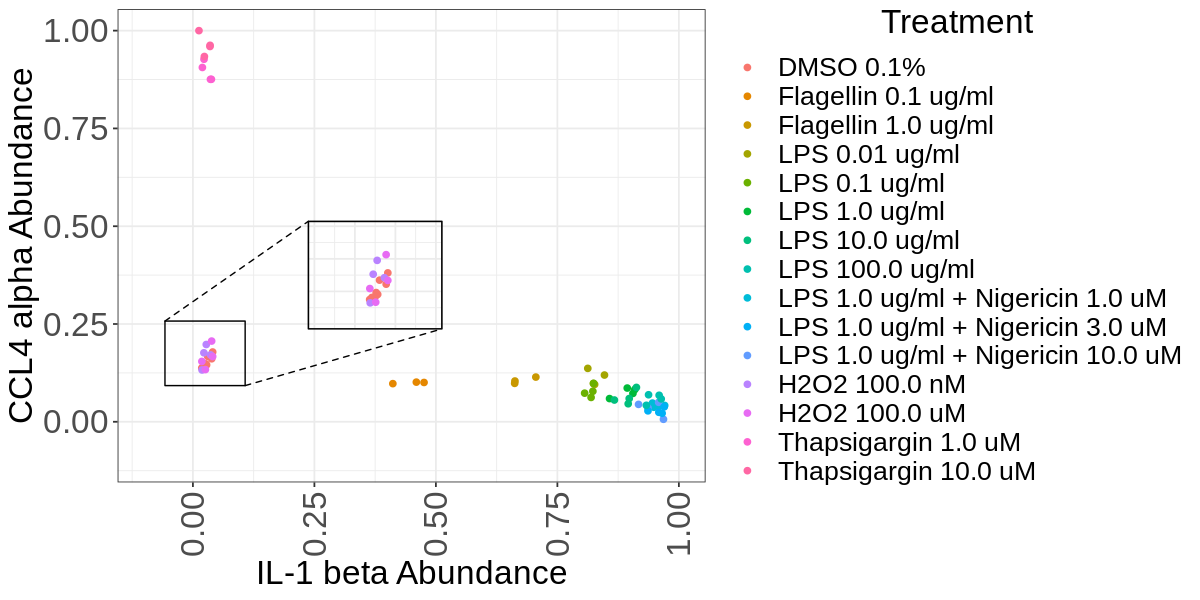

In [9]:
cytokine_scatter_plot1 <- (
    ggplot(
        data = cytokine_values,
        aes(
            x = `IL-1 beta [NSU]`,
            y = `CCL24 [NSU]`,
            color = oneb_Treatment_Dose_Inhibitor_Dose
        )
    )
    + geom_point()
    + theme_bw()
    + xlab("IL-1 beta Abundance")
    + ylab("CCL4 alpha Abundance")
    + xlim(-0.1, 1)
    + ylim(-0.1, 1)
    # rename legend title
    + labs(color = "Treatment", hjust = 0.5)
    + figure_theme
        + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
            + theme(
         legend.text = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5))

)

options(repr.plot.width=10, repr.plot.height=5)
# cytokine_scatter_plot
from <- list(-0.05, 0.1, 0.1, 0.25) #xmin, xmax, ymin, ymax
to <- list(0.25,0.5, 0.25, 0.5)
cytokine_scatter_plot1 <- cytokine_scatter_plot1 + geom_magnify(
    from = from, to = to
)
cytokine_scatter_plot1


### Bar plots of cytokine concentration

In [10]:
# import melted dataframes
# Figure 2A

# Load data
data_path_cytokine_values_melted <- file.path("..","..","2.Nomic_nELISA_Analysis/0.Exploratory_Analysis/PBMC/results/PBMC_all_cytokine_values_per_treatment_per_well_melted.parquet")
cytokine_values_melted <- arrow::read_parquet(data_path_cytokine_values_melted)
# filter out the treatments that are not in the list
cytokine_values_melted <- cytokine_values_melted[cytokine_values_melted$oneb_Treatment_Dose_Inhibitor_Dose %in% list_of_treatments,]


In [11]:
# select a few cytokines to visualize
cytokine_values_melted <- cytokine_values_melted[cytokine_values_melted$cytokine %in% c(
    "IL-1 beta [NSU]",
    "TNF alpha [NSU]",
    "CCL24 [NSU]",
    "IL-18 [NSU]",
    "IL-6 [NSU]",
    "Osteopontin (OPN) [NSU]",
    "CCL13 [NSU]",
    "IL-2 [NSU]"
    ),]


In [12]:
# set the order of the cytokines
cytokine_values_melted$Cytokine <- factor(cytokine_values_melted$cytokine, levels = c(
    "IL-1 beta [NSU]",
    "TNF alpha [NSU]",
    
    "IL-18 [NSU]",
    "IL-6 [NSU]",
    
    
    "IL-2 [NSU]",
    "Osteopontin (OPN) [NSU]",
    "CCL13 [NSU]",
    "CCL24 [NSU]"
    ))


In [13]:
# aggregate the data to get both the mean and the standard deviation
cytokine_values_melted_agg <- cytokine_values_melted %>% 
    group_by(cytokine, oneb_Treatment_Dose_Inhibitor_Dose) %>% 
    summarise(
        mean = mean(cytokine_value),
        sd = sd(cytokine_value)
    )
head(cytokine_values_melted_agg)


`summarise()` has grouped output by 'cytokine'. You can override using the
`.groups` argument.


cytokine,oneb_Treatment_Dose_Inhibitor_Dose,mean,sd
<chr>,<chr>,<dbl>,<dbl>
CCL13 [NSU],DMSO_0.100_%_DMSO_0.025_%,0.12418779,0.02840384
CCL13 [NSU],Flagellin_0.100_ug_per_ml_DMSO_0.025_%,0.12798859,0.03636485
CCL13 [NSU],Flagellin_1.000_ug_per_ml_DMSO_0.025_%,0.07684572,0.02809978
CCL13 [NSU],H2O2_100.000_nM_DMSO_0.025_%,0.11012973,0.02676393
CCL13 [NSU],H2O2_100.000_uM_DMSO_0.025_%,0.14471647,0.01453055
CCL13 [NSU],LPS_0.010_ug_per_ml_DMSO_0.025_%,0.13098658,0.02729576


In [14]:
# mutate the names of each treatment
cytokine_values_melted_agg <- cytokine_values_melted_agg %>%
    mutate(oneb_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Treatment_Dose_Inhibitor_Dose == "DMSO_0.100_%_DMSO_0.025_%" ~ "DMSO 0.1%",
        oneb_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.025_%" ~ "Flagellin 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM"
    ))

# mutate the names of each treatment
cytokine_values_melted_agg <- cytokine_values_melted_agg %>%
    mutate(cytokine = case_when(
        cytokine == "CCL13 [NSU]" ~ "CCL13",
        cytokine =="IL-1 beta [NSU]" ~ "IL-1 beta",
        cytokine =="TNF alpha [NSU]" ~ "TNF alpha",
        cytokine =="IL-18 [NSU]" ~ "IL-18",
        cytokine =="IL-6 [NSU]" ~ "IL-6",
        cytokine =="IL-2 [NSU]" ~ "IL-2",
        cytokine =="Osteopontin (OPN) [NSU]" ~ "Osteopontin",
        cytokine =="CCL13 [NSU]" ~ "CCL13",
        cytokine =="CCL24 [NSU]" ~ "CCL24"
    ))

cytokine_order = c(
    "IL-1 beta",
    "TNF alpha",
    "IL-18",
    "IL-6",
    "IL-2",
    "Osteopontin",
    "CCL13",
    "CCL24"
    )

cytokine_values_melted_agg$cytokine <- factor(cytokine_values_melted_agg$cytokine, levels = cytokine_order)

treatment_order <- c(
    'DMSO 0.1%',
    'Flagellin 0.1 ug/ml',
    'Flagellin 1.0 ug/ml',
    'LPS 0.01 ug/ml',
    'LPS 0.1 ug/ml',
    'LPS 1.0 ug/ml',
    'LPS 10.0 ug/ml',
    'LPS 100.0 ug/ml',
    'LPS 1.0 ug/ml + Nigericin 1.0 uM',
    'LPS 1.0 ug/ml + Nigericin 3.0 uM',
    'LPS 1.0 ug/ml + Nigericin 10.0 uM',
    'H2O2 100.0 nM',
    'H2O2 100.0 uM',
    'Thapsigargin 1.0 uM',
    'Thapsigargin 10.0 uM'
)
cytokine_values_melted_agg$oneb_Treatment_Dose_Inhibitor_Dose <- factor(cytokine_values_melted_agg$oneb_Treatment_Dose_Inhibitor_Dose, levels = treatment_order)


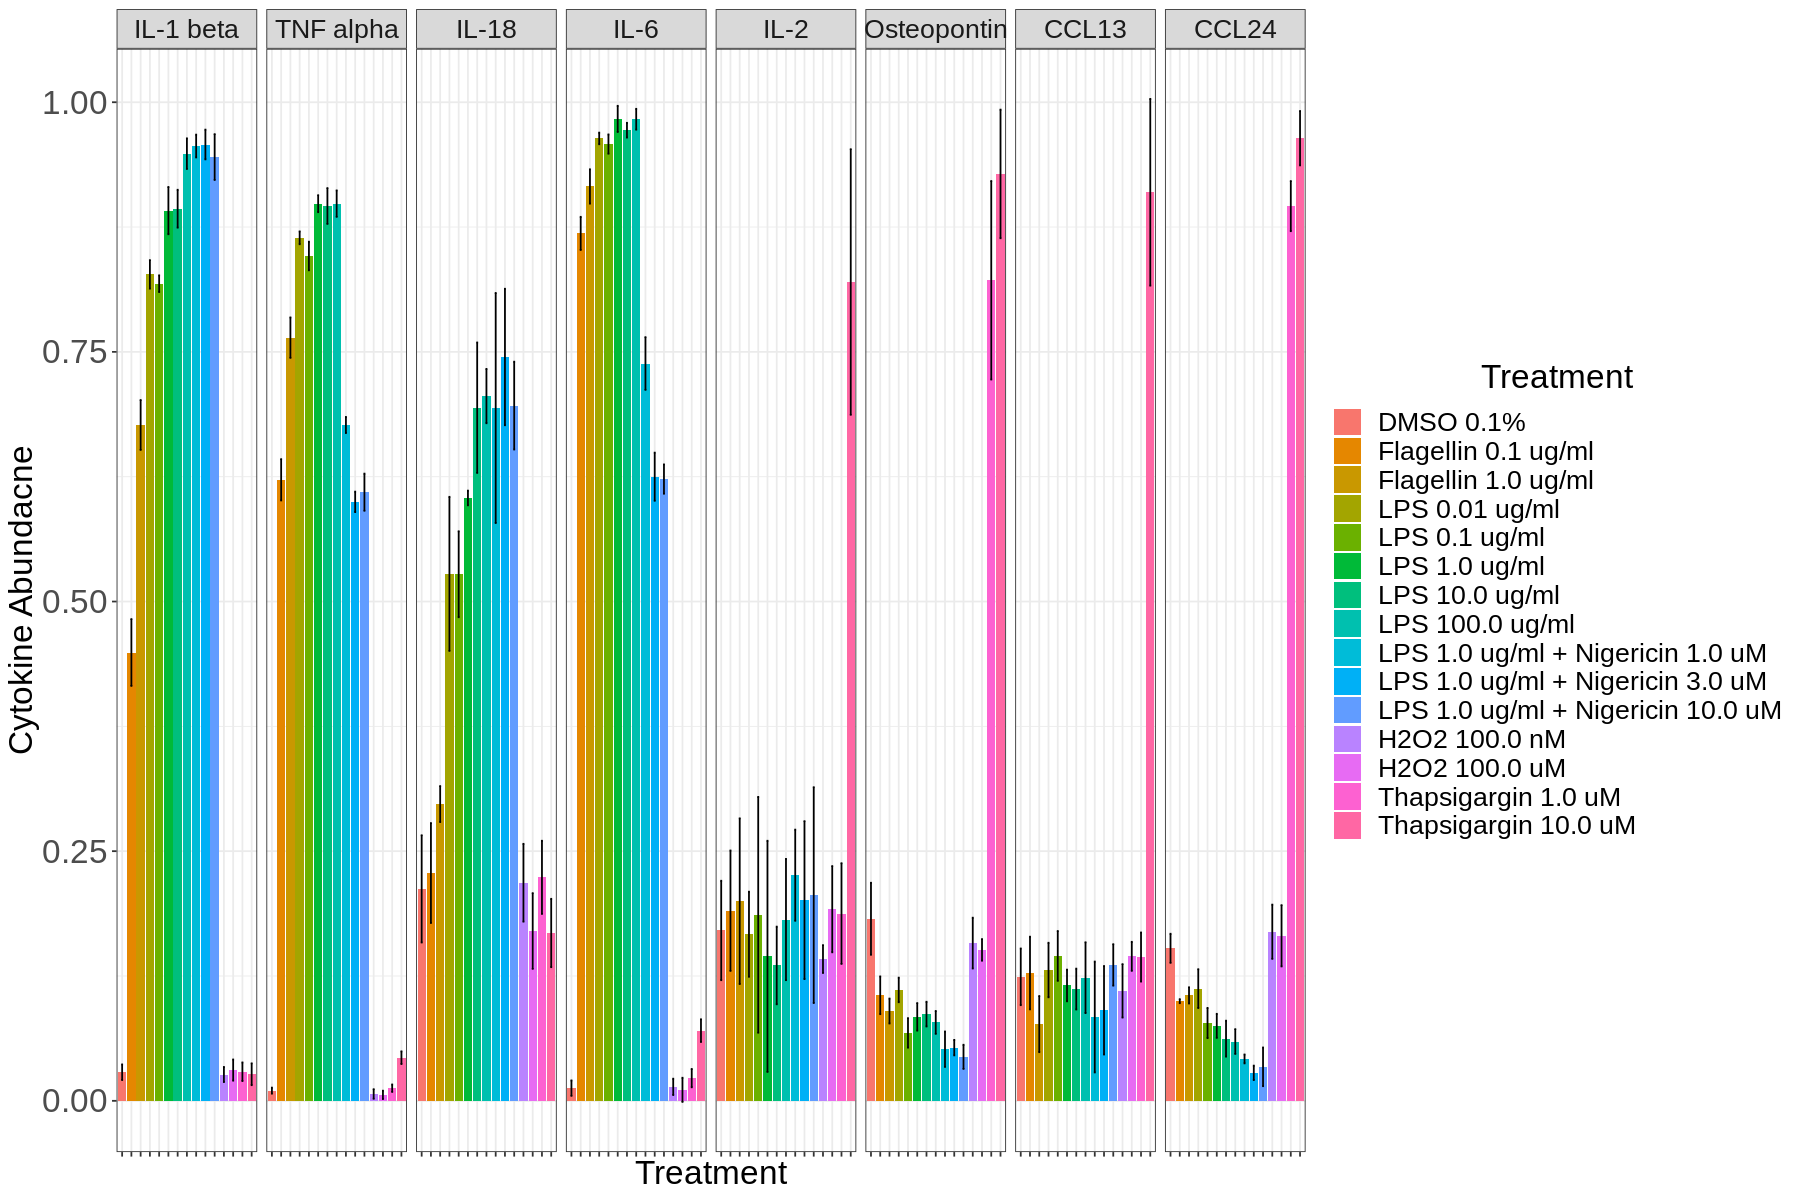

In [15]:
# set plot size 
options(repr.plot.width=15, repr.plot.height=10)
# make the bar plots for the cytokine values
cytokine_bar_plot <- (
    ggplot(data=cytokine_values_melted_agg,
           aes(x=oneb_Treatment_Dose_Inhibitor_Dose,
                y=mean,
                fill=oneb_Treatment_Dose_Inhibitor_Dose))
    + geom_bar(stat="identity", position="dodge")
    + theme_bw()
    + geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9))
    + facet_wrap(.~cytokine, nrow =1)
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + ylab("Cytokine Abundacne")
    + xlab("Treatment")
    # strip x axis labels
    
    + figure_theme
    + theme(axis.text.x = element_blank())
    + labs(fill = "Treatment", hjust = 0.5, size = 20)
    + theme(
         legend.text = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5))
    

)
cytokine_bar_plot


### Heatmap of cytokine concentration

In [16]:
# import melted dataframes
# Figure 2A

# Load data
data_path_cytokine_values_melted <- file.path("..","..","2.Nomic_nELISA_Analysis/0.Exploratory_Analysis/PBMC/results/PBMC_all_cytokine_values_per_treatment_per_well_melted.parquet")
cytokine_values_melted <- arrow::read_parquet(data_path_cytokine_values_melted)
# filter out the treatments that are not in the list
cytokine_values_melted <- subset(cytokine_values_melted, select = -Metadata_position_x)


In [17]:
head(cytokine_values_melted)


oneb_Treatment_Dose_Inhibitor_Dose,cytokine,cytokine_value
<chr>,<chr>,<dbl>
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.09770974
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06451266
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06185979
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06099844
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06111581
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.05323571


In [18]:
# drop two columns by name 
# aggregate the cytokine values across the treatments and cytokine
cytokine_values_agg <- cytokine_values_melted %>%
    group_by(cytokine,oneb_Treatment_Dose_Inhibitor_Dose) %>%
    summarise_all(mean)


In [19]:
head(cytokine_values_agg)


cytokine,oneb_Treatment_Dose_Inhibitor_Dose,cytokine_value
<chr>,<chr>,<dbl>
AITRL (GITR Ligand) [NSU],DMSO_0.100_%_DMSO_0.025_%,0.4940995
AITRL (GITR Ligand) [NSU],DMSO_0.100_%_DMSO_1.000_%,0.5243176
AITRL (GITR Ligand) [NSU],DMSO_0.100_%_Z-VAD-FMK_100.000_uM,0.3752564
AITRL (GITR Ligand) [NSU],DMSO_0.100_%_Z-VAD-FMK_30.000_uM,0.3889781
AITRL (GITR Ligand) [NSU],Disulfiram_0.100_uM_DMSO_0.025_%,0.5240792
AITRL (GITR Ligand) [NSU],Disulfiram_1.000_uM_DMSO_0.025_%,0.5096765


In [20]:
# create a matrix of the cytokine values for the clustering and heatmap
# unmelt the data 
cytokine_values_agg <- reshape2::dcast(cytokine_values_agg, oneb_Treatment_Dose_Inhibitor_Dose ~ cytokine, value.var = "cytokine_value")
# make oneb_Metadata_Treatment_Dose_Inhibitor_Dose the rownames
rownames(cytokine_values_agg) <- cytokine_values_agg$oneb_Treatment_Dose_Inhibitor_Dose
# drop the column
cytokine_values_agg <- subset(cytokine_values_agg, select = -c(oneb_Treatment_Dose_Inhibitor_Dose))


In [21]:
head(cytokine_values_agg)


,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],⋯,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Disulfiram_0.100_uM_DMSO_0.025_%,0.06730321,0.5240792,0.26674889,0.5023795,0.5309348,0.3937257,0.6358177,0.3984310,0.4198017,0.3606192,⋯,0.5166680,0.4767908,0.4605500,0.4115684,0.3381163,0.6802347,0.3854959,0.2440223,0.4071627,0.2291238
Disulfiram_1.000_uM_DMSO_0.025_%,0.07120969,0.5096765,0.33319231,0.3673681,0.4838848,0.3172901,0.6965589,0.3153944,0.4113612,0.3360172,⋯,0.3411230,0.2938467,0.3738126,0.4784020,0.3105525,0.5564414,0.4041607,0.1858099,0.4915471,0.2726109
Disulfiram_2.500_uM_DMSO_0.025_%,0.07503395,0.3898258,0.26079568,0.3541087,0.4880536,0.4563620,0.6906623,0.2804577,0.3722220,0.2512592,⋯,0.4017739,0.3931795,0.2996615,0.4479463,0.4743071,0.6227738,0.1792508,0.2580256,0.3833620,0.2188123
DMSO_0.100_%_DMSO_0.025_%,0.07246874,0.4940995,0.23914683,0.4820596,0.4744615,0.3851330,0.6010184,0.2504846,0.4196230,0.3238476,⋯,0.4583241,0.4528880,0.3506292,0.4413733,0.4563148,0.5649021,0.3833757,0.1963640,0.4166624,0.1974226
DMSO_0.100_%_DMSO_1.000_%,0.03793296,0.5243176,0.03069507,0.4113630,0.4663236,0.4419314,0.6551810,0.2842837,0.5404479,0.2908964,⋯,0.5305307,0.3763025,0.3465639,0.4473434,0.6629754,0.6740278,0.4390040,0.1533047,0.5611511,0.1932183
DMSO_0.100_%_Z-VAD-FMK_100.000_uM,0.04165845,0.3752564,0.05343949,0.4534571,0.4793325,0.3365215,0.5873664,0.2822391,0.5846508,0.4748176,⋯,0.4088662,0.4296843,0.3395713,0.3640923,0.5794621,0.7040245,0.3328181,0.1111599,0.4912596,0.6167773


In [22]:
row_dend <- as.dendrogram(hclust(dist(cytokine_values_agg)))
col_dend <- as.dendrogram(hclust(dist(t(cytokine_values_agg))))


In [23]:
# remove '[NSU]' from the column names
colnames(cytokine_values_agg) <- gsub("\\[NSU\\]", "", colnames(cytokine_values_agg))


In [24]:
cytokine_values_agg <- as.matrix(cytokine_values_agg)


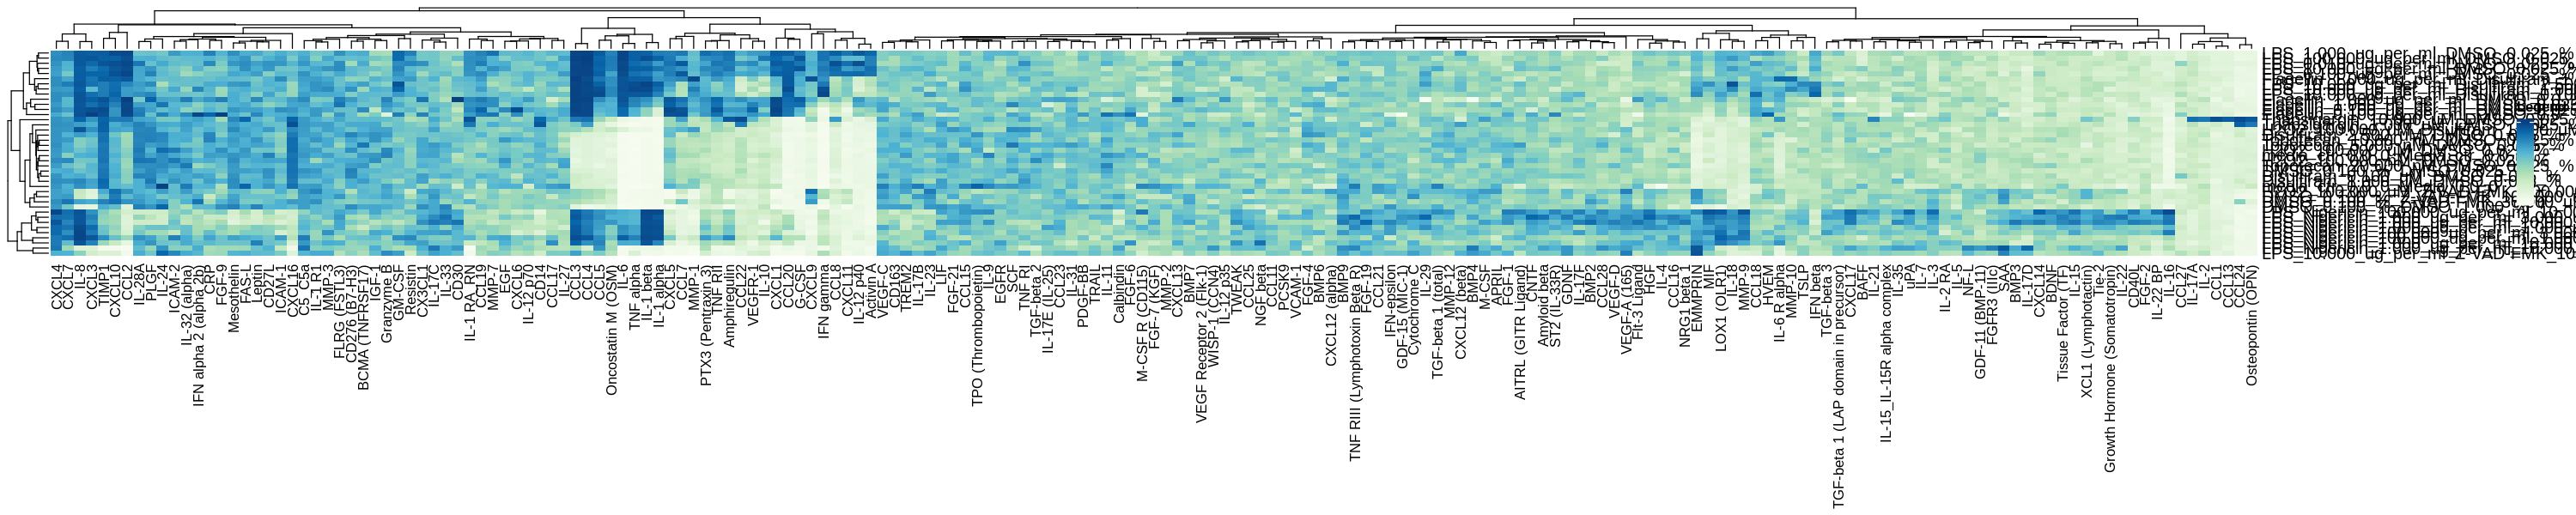

In [25]:
# set plot size 
options(repr.plot.width=25, repr.plot.height=5)
heatmap_plot_all <- (
  Heatmap(
  (cytokine_values_agg),
  col = brewer.pal(9, "GnBu"),
  cluster_rows = TRUE,    # Cluster rows
  cluster_columns = TRUE, # Cluster columns
  show_row_names = TRUE,  # Show row names
  show_column_names = TRUE, # Show column names
  column_names_gp = gpar(fontsize = 10), # Column name label formatting
  row_names_gp = gpar(fontsize = 12),    # Row name label formatting
  heatmap_legend_param = list(title = "Legend", at = c(0, 1)),
  # make the tiles rectangular
  rect_gp = gpar(col = NA),
  )
)
heatmap_plot_all


In [26]:
# import the tukey test results
tukey_results_path <- file.path("..","..","2.Nomic_nELISA_Analysis/0.Exploratory_Analysis/PBMC/results/tukey_test_results.csv")
# read in the data
tukey_results <- read.csv(tukey_results_path, header = TRUE, sep = ",")

# reload in the cytokine values
data_path_cytokine_values_melted <- file.path("..","..","2.Nomic_nELISA_Analysis/0.Exploratory_Analysis/PBMC/results/PBMC_all_cytokine_values_per_treatment_per_well_melted.parquet")
cytokine_values_melted <- arrow::read_parquet(data_path_cytokine_values_melted)
# filter out the treatments that are not in the list
cytokine_values_melted <- cytokine_values_melted[cytokine_values_melted$oneb_Treatment_Dose_Inhibitor_Dose %in% list_of_treatments,]
# drop metadata position x
cytokine_values_melted <- subset(cytokine_values_melted, select = -Metadata_position_x)
head(cytokine_values_melted)
# aggregate the cytokine values across the treatments and cytokine
cytokine_values_melted_agg <- cytokine_values_melted %>%
    group_by(oneb_Treatment_Dose_Inhibitor_Dose, cytokine) %>%
    summarise(cytokine_value = mean(cytokine_value))


oneb_Treatment_Dose_Inhibitor_Dose,cytokine,cytokine_value
<chr>,<chr>,<dbl>
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.09770974
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06451266
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06185979
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06099844
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.06111581
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.05323571


`summarise()` has grouped output by 'oneb_Treatment_Dose_Inhibitor_Dose'. You
can override using the `.groups` argument.


In [27]:
cytokine_values_melted_agg_filtered <- cytokine_values_melted_agg[cytokine_values_melted_agg$cytokine %in% unique(tukey_results$cytokine),]
head(cytokine_values_melted_agg_filtered)


oneb_Treatment_Dose_Inhibitor_Dose,cytokine,cytokine_value
<chr>,<chr>,<dbl>
DMSO_0.100_%_DMSO_0.025_%,APRIL [NSU],0.47446146
DMSO_0.100_%_DMSO_0.025_%,Activin A [NSU],0.07246874
DMSO_0.100_%_DMSO_0.025_%,Amphiregulin [NSU],0.23914683
DMSO_0.100_%_DMSO_0.025_%,Amyloid beta [NSU],0.48205962
DMSO_0.100_%_DMSO_0.025_%,BAFF [NSU],0.38513295
DMSO_0.100_%_DMSO_0.025_%,BCMA (TNFRSF17) [NSU],0.60101842


In [28]:
# mutate the names of each treatment
cytokine_values_melted_agg_filtered <- cytokine_values_melted_agg_filtered %>%
    mutate(oneb_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Treatment_Dose_Inhibitor_Dose == "DMSO_0.100_%_DMSO_0.025_%" ~ "DMSO 0.1%",
        oneb_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.025_%" ~ "Flagellin 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM"
    ))


In [29]:
head(cytokine_values_melted_agg_filtered)


oneb_Treatment_Dose_Inhibitor_Dose,cytokine,cytokine_value
<chr>,<chr>,<dbl>
DMSO 0.1%,APRIL [NSU],0.47446146
DMSO 0.1%,Activin A [NSU],0.07246874
DMSO 0.1%,Amphiregulin [NSU],0.23914683
DMSO 0.1%,Amyloid beta [NSU],0.48205962
DMSO 0.1%,BAFF [NSU],0.38513295
DMSO 0.1%,BCMA (TNFRSF17) [NSU],0.60101842


In [30]:

# fix the col name
cytokine_values_melted_agg_filtered <- cytokine_values_melted_agg_filtered %>% 
  mutate(cytokine = case_when(
    cytokine == "MMP-1 [NSU]" ~ "MMP-1",
    cytokine == "VEGFR-1 [NSU]" ~ "VEGFR-1",
    cytokine == "CCL4 [NSU]" ~ "CCL4",
    cytokine == "MMP-12 [NSU]" ~ "MMP-12",
    cytokine == "CCL18 [NSU]" ~ "CCL18",
    cytokine == "IL-9 [NSU]" ~ "IL-9",
    cytokine == "TWEAK [NSU]" ~ "TWEAK",
    cytokine == "EGFR [NSU]" ~ "EGFR",
    cytokine == "IL-21 [NSU]" ~ "IL-21",
    cytokine == "FGF-1 [NSU]" ~ "FGF-1",
    cytokine == "FAS-L [NSU]" ~ "FAS-L",
    cytokine == "CXCL12 (beta) [NSU]" ~ "CXCL12 (beta)",
    cytokine == "CXCL12 (alpha) [NSU]" ~ "CXCL12 (alpha)",
    cytokine == "CXCL14 [NSU]" ~ "CXCL14",
    cytokine == "HGF [NSU]" ~ "HGF",
    cytokine == "IL-3 [NSU]" ~ "IL-3",
    cytokine == "CXCL7 [NSU]" ~ "CXCL7",
    cytokine == "CCL25 [NSU]" ~ "CCL25",
    cytokine == "BMP9 [NSU]" ~ "BMP9",
    cytokine == "IL-12 p35 [NSU]" ~ "IL-12 p35",
    cytokine == "CCL16 [NSU]" ~ "CCL16",
    cytokine == "CCL2 [NSU]" ~ "CCL2",
    cytokine == "LIF [NSU]" ~ "LIF",
    cytokine == "CXCL9 [NSU]" ~ "CXCL9",
    cytokine == "CNTF [NSU]" ~ "CNTF",
    cytokine == "TSLP [NSU]" ~ "TSLP",
    cytokine == "Flt-3 Ligand [NSU]" ~ "Flt-3 Ligand",
    cytokine == "CD14 [NSU]" ~ "CD14",
    cytokine == "IL-16 [NSU]" ~ "IL-16",
    cytokine == "FGF-21 [NSU]" ~ "FGF-21",
    cytokine == "IL-29 [NSU]" ~ "IL-29",
    cytokine == "IL-17C [NSU]" ~ "IL-17C",
    cytokine == "IFN-epsilon [NSU]" ~ "IFN-epsilon",
    cytokine == "PCSK9 [NSU]" ~ "PCSK9",
    cytokine == "TPO (Thrombopoietin) [NSU]" ~ "Thrombopoietin",
    cytokine == "TREM2 [NSU]" ~ "TREM2",
    cytokine == "Growth Hormone (Somatotropin) [NSU]" ~ "Somatotropin",
    cytokine == "CCL1 [NSU]" ~ "CCL1",
    cytokine == "LOX1 (OLR1) [NSU]" ~ "LOX1 (OLR1)",
    cytokine == "MMP-3 [NSU]" ~ "MMP-3",
    cytokine == "IL-32 (alpha) [NSU]" ~ "IL-32 (alpha)",
    cytokine == "IL-7 [NSU]" ~ "IL-7",
    cytokine == "CCL21 [NSU]" ~ "CCL21",
    cytokine == "CD276 (B7-H3) [NSU]" ~ "CD276 (B7-H3)",
    cytokine == "IL-2 RA [NSU]" ~ "IL-2 RA",
    cytokine == "Calbindin [NSU]" ~ "Calbindin",
    cytokine == "CCL3 [NSU]" ~ "CCL3",
    cytokine == "ICAM-1 [NSU]" ~ "ICAM-1",
    cytokine == "IL-17A [NSU]" ~ "IL-17A",
    cytokine == "CCL28 [NSU]" ~ "CCL28",
    cytokine == "TIMP1 [NSU]" ~ "TIMP1",
    cytokine == "GDF-15 (MIC-1) [NSU]" ~ "GDF-15 (MIC-1)",
    cytokine == "CXCL17 [NSU]" ~ "CXCL17",
    cytokine == "M-CSF R (CD115) [NSU]" ~ "M-CSF R (CD115)",
    cytokine == "CCL7 [NSU]" ~ "CCL7",
    cytokine == "Granzyme B [NSU]" ~ "Granzyme B",
    cytokine == "CXCL4 [NSU]" ~ "CXCL4",
    cytokine == "PDGF-BB [NSU]" ~ "PDGF-BB",
    cytokine == "CX3CL1 [NSU]" ~ "CX3CL1",
    cytokine == "FGF-6 [NSU]" ~ "FGF-6",
    cytokine == "IL-35 [NSU]" ~ "IL-35",
    cytokine == "MMP-7 [NSU]" ~ "MMP-7",
    cytokine == "GM-CSF [NSU]" ~ "GM-CSF",
    cytokine == "CCL24 [NSU]" ~ "CCL24",
    cytokine == "IL-12 p40 [NSU]" ~ "IL-12 p40",
    cytokine == "IL-5 [NSU]" ~ "IL-5",
    cytokine == "BCMA (TNFRSF17) [NSU]" ~ "BCMA (TNFRSF17)",
    cytokine == "Tissue Factor (TF) [NSU]" ~ "Tissue Factor",
    cytokine == "IL-1 beta [NSU]" ~ "IL-1 beta",
    cytokine == "CD30 [NSU]" ~ "CD30",
    cytokine == "CCL27 [NSU]" ~ "CCL27",
    cytokine == "ICAM-2 [NSU]" ~ "ICAM-2",
    cytokine == "CXCL16 [NSU]" ~ "CXCL16",
    cytokine == "VEGF-A (165) [NSU]" ~ "VEGF-A (165)",
    cytokine == "IL-2 [NSU]" ~ "IL-2",
    cytokine == "HVEM [NSU]" ~ "HVEM",
    cytokine == "PTX3 (Pentraxin 3) [NSU]" ~ "PTX3",
    cytokine == "IL-1 alpha [NSU]" ~ "IL-1 alpha",
    cytokine == "CXCL3 [NSU]" ~ "CXCL3",
    cytokine == "Oncostatin M (OSM) [NSU]" ~ "Oncostatin M",
    cytokine == "CCL8 [NSU]" ~ "CCL8",
    cytokine == "CCL15 [NSU]" ~ "CCL15",
    cytokine == "FLRG (FSTL3) [NSU]" ~ "FLRG",
    cytokine == "CXCL5 [NSU]" ~ "CXCL5",
    cytokine == "CD163 [NSU]" ~ "CD163",
    cytokine == "IL-17E (IL-25) [NSU]" ~ "IL-17E",
    cytokine == "NF-L [NSU]" ~ "NF-L",
    cytokine == "alpha 2b) [NSU]" ~ "IFN alpha 2",
    cytokine == "TNF RI [NSU]" ~ "TNF RI",
    cytokine == "CD40L [NSU]" ~ "CD40L",
    cytokine == "IFN beta [NSU]" ~ "IFN beta",
    cytokine == "VEGF Receptor 2 (Flk-1) [NSU]" ~ "VEGF Receptor 2",
    cytokine == "BDNF [NSU]" ~ "BDNF",
    cytokine == "Amyloid beta [NSU]" ~ "Amyloid beta",
    cytokine == "MMP-2 [NSU]" ~ "MMP-2",
    cytokine == "SAA [NSU]" ~ "SAA",
    cytokine == "uPA [NSU]" ~ "uPA",
    cytokine == "IL-22 BP [NSU]" ~ "IL-22 BP",
    cytokine == "TRAIL [NSU]" ~ "TRAIL",
    cytokine == "Mesothelin [NSU]" ~ "Mesothelin",
    cytokine == "Activin A [NSU]" ~ "Activin A",
    cytokine == "MMP-9 [NSU]" ~ "MMP-9",
    cytokine == "CCL13 [NSU]" ~ "CCL13",
    cytokine == "CXCL11 [NSU]" ~ "CXCL11",
    cytokine == "IL-31 [NSU]" ~ "IL-31",
    cytokine == "MIF [NSU]" ~ "MIF",
    cytokine == "BMP7 [NSU]" ~ "BMP7",
    cytokine == "IL-12 p70 [NSU]" ~ "IL-12 p70",
    cytokine == "CCL19 [NSU]" ~ "CCL19",
    cytokine == "CCL5 [NSU]" ~ "CCL5",
    cytokine == "IL-33 [NSU]" ~ "IL-33",
    cytokine == "IL-22 [NSU]" ~ "IL-22",
    cytokine == "CCL11 [NSU]" ~ "CCL11",
    cytokine == "IL-8 [NSU]" ~ "IL-8",
    cytokine == "SCF [NSU]" ~ "SCF",
    cytokine == "TNF RII [NSU]" ~ "TNF RII",
    cytokine == "FGF-2 [NSU]" ~ "FGF-2",
    cytokine == "Leptin [NSU]" ~ "Leptin",
    cytokine == "CXCL13 [NSU]" ~ "CXCL13",
    cytokine == "TNF alpha [NSU]" ~ "TNF alpha",
    cytokine == "IL-4 [NSU]" ~ "IL-4",
    cytokine == "CCL23 [NSU]" ~ "CCL23",
    cytokine == "IGF-1 [NSU]" ~ "IGF-1",
    cytokine == "FGF-4 [NSU]" ~ "FGF-4",
    cytokine == "GDF-11 (BMP-11) [NSU]" ~ "GDF-11 (BMP-11)",
    cytokine == "IL-10 [NSU]" ~ "IL-10",
    cytokine == "IL-23 [NSU]" ~ "IL-23",
    cytokine == "TNF RIII (Lymphotoxin Beta R) [NSU]" ~ "TNF RIII",
    cytokine == "IL-17B [NSU]" ~ "IL-17B",
    cytokine == "ST2 (IL-33R) [NSU]" ~ "ST2 (IL-33R)",
    cytokine == "PLGF [NSU]" ~ "PLGF",
    cytokine == "VEGF-D [NSU]" ~ "VEGF-D",
    cytokine == "XCL1 (Lymphotactin) [NSU]" ~ "XCL1",
    cytokine == "GDNF [NSU]" ~ "GDNF",
    cytokine == "C5 [NSU]" ~ "C5",
    cytokine == "IL-1 RA" ~ "IL-1 RA",
    cytokine == "IL-17D [NSU]" ~ "IL-17D",
    cytokine == "IL-27 [NSU]" ~ "IL-27",
    cytokine == "Osteopontin (OPN) [NSU]" ~ "Osteopontin",
    cytokine == "FGF-9 [NSU]" ~ "FGF-9",
    cytokine == "BAFF [NSU]" ~ "BAFF",
    cytokine == "TGF-beta 3 [NSU]" ~ "TGF-beta 3",
    cytokine == "EGF [NSU]" ~ "EGF",
    cytokine == "IL-5 [NSU]" ~ "IL-5",
    cytokine == "FGF-7 (KGF) [NSU]" ~ "FGF-7 (KGF)",
    cytokine == "APRIL [NSU]" ~ "APRIL",
    cytokine == "WISP-1 (CCN4) [NSU]" ~ "WISP-1 (CCN4)",
    cytokine == "CCL22 [NSU]" ~ "CCL22",
    cytokine == "FGF-19 [NSU]" ~ "FGF-19",
    cytokine == "M-CSF [NSU]" ~ "M-CSF",
    cytokine == "CXCL10 [NSU]" ~ "CXCL10",
    cytokine == "TGF-beta 1 (total) [NSU]" ~ "TGF-beta 1 ",
    cytokine == "Tie-2 [NSU]" ~ "Tie-2",
    cytokine == "TGF-beta 1 (LAP domain in precursor) [NSU]" ~ "TGF-beta 1",
    cytokine == "FGFR3 (IIIc) [NSU]" ~ "FGFR3 (IIIc)",
    cytokine == "AITRL (GITR Ligand) [NSU]" ~ "AITRL (GITR Ligand)",
    cytokine == "Amphiregulin [NSU]" ~ "Amphiregulin",
    cytokine == "BMP4 [NSU]" ~ "BMP4",
    cytokine == "G-CSF [NSU]" ~ "G-CSF",
    cytokine == "TGF-beta 2 [NSU]" ~ "TGF-beta 2",
    cytokine == "IL-6 R alpha [NSU]" ~ "IL-6 R alpha",
    cytokine == "BMP6 [NSU]" ~ "BMP6",
    cytokine == "NGF beta [NSU]" ~ "NGF beta",
    cytokine == "IL-1 R1 [NSU]" ~ "IL-1 R1",
    cytokine == "MMP-10 [NSU]" ~ "MMP-10",
    cytokine == "IL-17F [NSU]" ~ "IL-17F",
    cytokine == "IL-18 [NSU]" ~ "IL-18",
    cytokine == "CXCL6 [NSU]" ~ "CXCL6",
    cytokine == "IL-6 [NSU]" ~ "IL-6",
    cytokine == "CXCL1 [NSU]" ~ "CXCL1",
    cytokine == "VEGF-C [NSU]" ~ "VEGF-C",
    cytokine == "Resistin [NSU]" ~ "Resistin",
    cytokine == "EMMPRIN [NSU]" ~ "EMMPRIN",
    cytokine == "IFN gamma [NSU]" ~ "IFN gamma",
    cytokine == "CCL20 [NSU]" ~ "CCL20",
    cytokine == "CRP [NSU]" ~ "CRP",
    cytokine == "VCAM-1 [NSU]" ~ "VCAM-1",
    cytokine == "Cytochrome C [NSU]" ~ "Cytochrome C",
    cytokine == "BMP3 [NSU]" ~ "BMP3",
    cytokine == "IL-24 [NSU]" ~ "IL-24",
    cytokine == "IL-28A [NSU]" ~ "IL-28A",
    cytokine == "CCL17 [NSU]" ~ "CCL17",
    cytokine == "BMP2 [NSU]" ~ "BMP2",
    cytokine == "CD27L [NSU]" ~ "CD27L",
    cytokine == "NRG1 beta 1 [NSU]" ~ "NRG1 beta 1",
    cytokine == "IL-11 [NSU]" ~ "IL-11"
  ))


In [31]:
head(cytokine_values_melted_agg_filtered)


oneb_Treatment_Dose_Inhibitor_Dose,cytokine,cytokine_value
<chr>,<chr>,<dbl>
DMSO 0.1%,APRIL,0.47446146
DMSO 0.1%,Activin A,0.07246874
DMSO 0.1%,Amphiregulin,0.23914683
DMSO 0.1%,Amyloid beta,0.48205962
DMSO 0.1%,BAFF,0.38513295
DMSO 0.1%,BCMA (TNFRSF17),0.60101842


In [32]:
# un melt the data cytokine_values_melted_agg_filtered
# similar to pivot table in excel
cytokine_values_melted_agg_filtered <- reshape2::dcast(cytokine_values_melted_agg_filtered, oneb_Treatment_Dose_Inhibitor_Dose ~ cytokine, value.var = "cytokine_value",fun.aggregate = mean)

# make oneb_Metadata_Treatment_Dose_Inhibitor_Dose the index
row.names(cytokine_values_melted_agg_filtered) <- cytokine_values_melted_agg_filtered$oneb_Treatment_Dose_Inhibitor_Dose
# drop the column
cytokine_values_melted_agg_filtered <- subset(cytokine_values_melted_agg_filtered, select = -c(oneb_Treatment_Dose_Inhibitor_Dose))


In [33]:
cytokine_values_melted_agg_filtered <- as.matrix(cytokine_values_melted_agg_filtered)


In [34]:
# remove '[NSU]' from the column names
colnames(cytokine_values_melted_agg_filtered) <- gsub("\\[NSU\\]", "", colnames(cytokine_values_melted_agg_filtered))


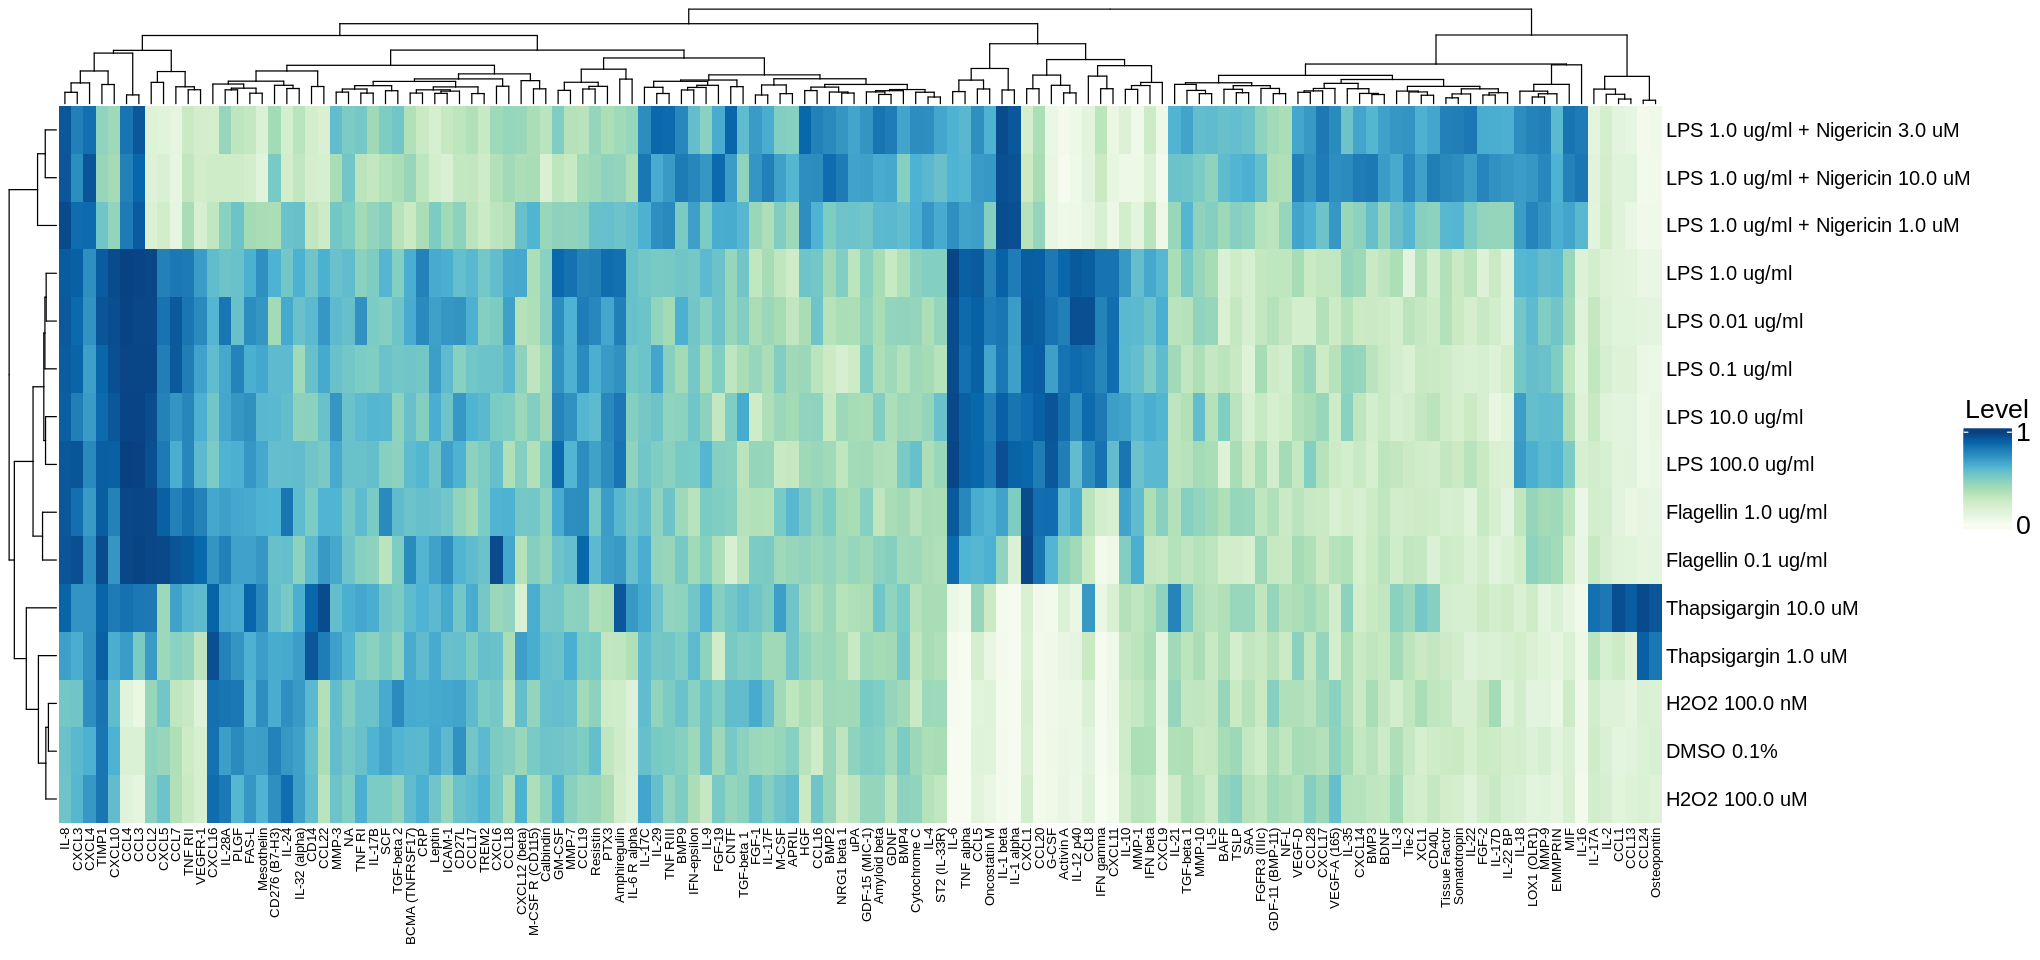

In [35]:
col_func <- colorRampPalette(brewer.pal(9, "Purples"))
# set plot size
options(repr.plot.width=17, repr.plot.height=8, units = "cm")
heatmap_anova_cytokines <- (
    Heatmap(
        (cytokine_values_melted_agg_filtered), 
        col = brewer.pal(9, "GnBu"),
        cluster_rows = TRUE,    # Cluster rows
        cluster_columns = TRUE, # Cluster columns
        show_row_names = TRUE,  # Show row names
        show_column_names = TRUE, # Show column names
        column_names_gp = gpar(fontsize = 8), # Column name label formatting
        row_names_gp = gpar(fontsize = 12),    # Row name label formatting
        # make the tiles rectangular
        rect_gp = gpar(col = NA),
        heatmap_legend_param = list(
                title = "Level", at = c(0, 1), 
                title_position = "topcenter", 
                title_gp = gpar(fontsize = 16), 
                labels_gp = gpar(fontsize = 16),
                direction = "vertical",
                padding = unit(c(10, 10, 5, 5), "mm"),
                grid_width = unit(10, "mm"),
                grid_height = unit(200, "mm")
                ),
        column_dend_height = unit(2, "cm"), 
        row_dend_width = unit(1, "cm")
    )
)
heatmap_anova_cytokines 


## UMAP Plots

In [36]:
# read in the UMAP results
umap_results_path <- file.path("..","..","2.Nomic_nELISA_Analysis/1.umap/PBMC/results/nELISA_plate_430420_umap_PBMC.csv")

umap_results_selected_treatments_path <- file.path("..","..","2.Nomic_nELISA_Analysis/1.umap/PBMC/results/nELISA_plate_430420_umap_PBMC_selected_treatments.csv")
# read in the data
umap_results <- read.csv(umap_results_path, header = TRUE, sep = ",")
umap_results_selected_treatments <- read.csv(umap_results_selected_treatments_path, header = TRUE, sep = ",")


In [37]:
unique(umap_results_selected_treatments$oneb_Treatment_Dose_Inhibitor_Dose)


[1] "DMSO_0.100_%_DMSO_0.025_%"                           
 [2] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"              
 [3] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                    
 [4] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                    
 [5] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"              
 [6] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%" 
 [7] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"
 [8] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%" 
 [9] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                    
[10] "Thapsigargin_1.000_uM_DMSO_0.025_%"                  
[11] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                   
[12] "Thapsigargin_10.000_uM_DMSO_0.025_%"                 
[13] "H2O2_100.000_nM_DMSO_0.025_%"                        
[14] "H2O2_100.000_uM_DMSO_0.025_%"

In [38]:
umap_results_selected_treatments$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(umap_results_selected_treatments$oneb_Treatment_Dose_Inhibitor_Dose, levels = list_of_treatments)
# umap_results$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- factor(umap_results$oneb_Treatment_Dose_Inhibitor_Dose, levels = list_of_treatments)


In [39]:
# mutate the names of each treatment
umap_results_selected_treatments <- umap_results_selected_treatments %>%
    mutate(oneb_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Treatment_Dose_Inhibitor_Dose == "DMSO_0.100_%_DMSO_0.025_%" ~ "DMSO 0.1%",
        oneb_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.025_%" ~ "Flagellin 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM"
    ))


In [40]:
unique(umap_results$oneb_Treatment_Dose_Inhibitor_Dose)


[1] "DMSO_0.100_%_DMSO_0.025_%"                                   
 [2] "DMSO_0.100_%_DMSO_1.000_%"                                   
 [3] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"                           
 [4] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
 [5] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                      
 [6] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"               
 [7] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                            
 [8] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                            
 [9] "Flagellin_0.100_ug_per_ml_DMSO_0.0_%"                        
[10] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
[11] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
[12] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"         
[13] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"        
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM" 
[15] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
[16] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"         
[17] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                            
[18] "Flagellin_1.000_ug_per_ml_DMSO_0.0_%"                        
[19] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
[20] "Thapsigargin_1.000_uM_DMSO_0.025_%"                          
[21] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[22] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                           
[23] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                    
[24] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                    
[25] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                    
[26] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[27] "Thapsigargin_10.000_uM_DMSO_0.025_%"                         
[28] "H2O2_100.000_nM_DMSO_0.025_%"                                
[29] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"       
[30] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"      
[31] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"       
[32] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                          
[33] "H2O2_100.000_uM_DMSO_0.025_%"                                
[34] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[35] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[36] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
[37] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[38] "Topotecan_5.000_nM_DMSO_0.025_%"                             
[39] "media_ctr_0.0_0_Media_ctr_0.0_0"                             
[40] "media_ctr_0.0_0_Media_0.0_0"

In [41]:
umap_results <- umap_results %>%
    mutate(oneb_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_0.025_%' ~ "DMSO 0.1% - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_1.000_%' ~ "DMSO 0.1% - DMSO 1.0%",
        oneb_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_100.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 100.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_30.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 30.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM' ~ "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.0%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Disulfiram_0.100_uM_DMSO_0.025_%' ~ "Disulfiram 0.1 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Disulfiram_1.000_uM_DMSO_0.025_%' ~ "Disulfiram 1.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Topotecan_10.000_nM_DMSO_0.025_%' ~ "Topotecan 10.0 nM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_0.100_uM' ~ "LPS 10.0 ug/ml - Disulfiram 0.1 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_1.000_uM' ~ "LPS 10.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_2.500_uM' ~ "LPS 10.0 ug/ml - Disulfiram 2.5 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM' ~ "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Disulfiram_1.000_uM' ~ "H2O2 100.0 uM - Disulfiram 1.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Z-VAD-FMK_100.000_uM' ~ "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Treatment_Dose_Inhibitor_Dose =='Disulfiram_2.500_uM_DMSO_0.025_%' ~ "Disulfiram 2.5 uM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Topotecan_20.000_nM_DMSO_0.025_%' ~ "Topotecan 20.0 nM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='Topotecan_5.000_nM_DMSO_0.025_%' ~ "Topotecan 5.0 nM - DMSO 0.025%",
        oneb_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_ctr_0.0_0' ~ "Media ctr 0.0 0",
        oneb_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_0.0_0' ~ "Media ctr 0.0 0"
    ))


In [42]:
head(umap_results)


,plate_name,plate_barcode,position_x,cell_type,incubation.inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,⋯,WISP.1..CCN4...NSU.,XCL1..Lymphotactin...NSU.,Treatment,Dose,oneb_Treatment_Dose_Inhibitor_Dose,twob_Treatment_Dose_Inhibitor_Dose,threeb_Treatment_Dose_Inhibitor_Dose,fourb_Treatment_Dose_Inhibitor_Dose,umap_1,umap_2
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,70117_20230210MM1_P1,430420,B06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.5242758,0.25067049,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-3.847429,14.16169
2,70117_20230210MM1_P1,430420,C06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.4550923,0.22875231,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-3.159999,17.53089
3,70117_20230210MM1_P1,430420,I06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.2135963,0.06464467,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-4.438748,15.74924
4,70117_20230210MM1_P1,430420,J06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.1409924,0.23419108,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-6.070036,15.31512
5,70117_20230210MM1_P1,430420,B07,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.5416893,0.16707815,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-3.539103,16.60268
6,70117_20230210MM1_P1,430420,C07,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.5684098,0.24460178,DMSO,0.100_%,DMSO 0.1% - DMSO 0.025%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-2.486607,14.76610


In [43]:
treatment_order <- c(
    'DMSO 0.1%',
    'Flagellin 0.1 ug/ml',
    'Flagellin 1.0 ug/ml',
    'LPS 0.01 ug/ml',
    'LPS 0.1 ug/ml',
    'LPS 1.0 ug/ml',
    'LPS 10.0 ug/ml',
    'LPS 100.0 ug/ml',
    'LPS 1.0 ug/ml + Nigericin 1.0 uM',
    'LPS 1.0 ug/ml + Nigericin 3.0 uM',
    'LPS 1.0 ug/ml + Nigericin 10.0 uM',
    'H2O2 100.0 nM',
    'H2O2 100.0 uM',
    'Thapsigargin 1.0 uM',
    'Thapsigargin 10.0 uM'
)
umap_results_selected_treatments$oneb_Treatment_Dose_Inhibitor_Dose <- factor(umap_results_selected_treatments$oneb_Treatment_Dose_Inhibitor_Dose, levels = treatment_order)


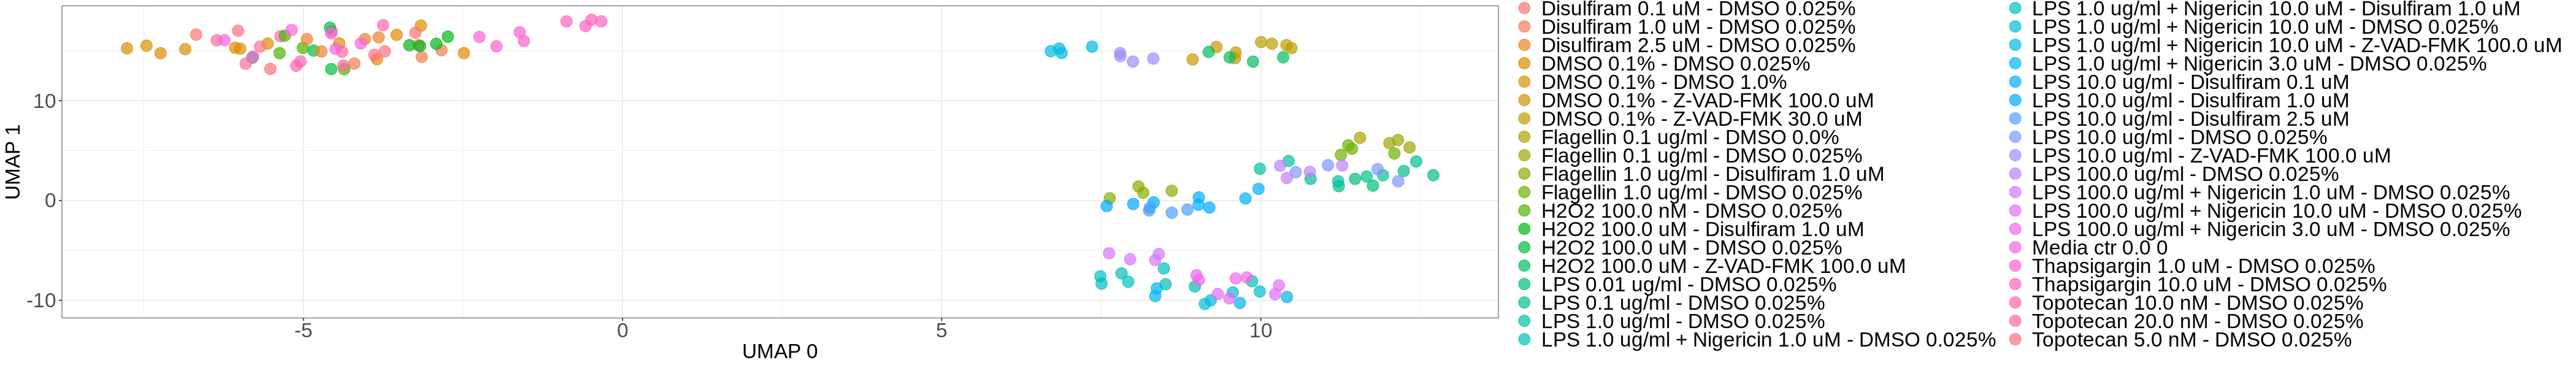

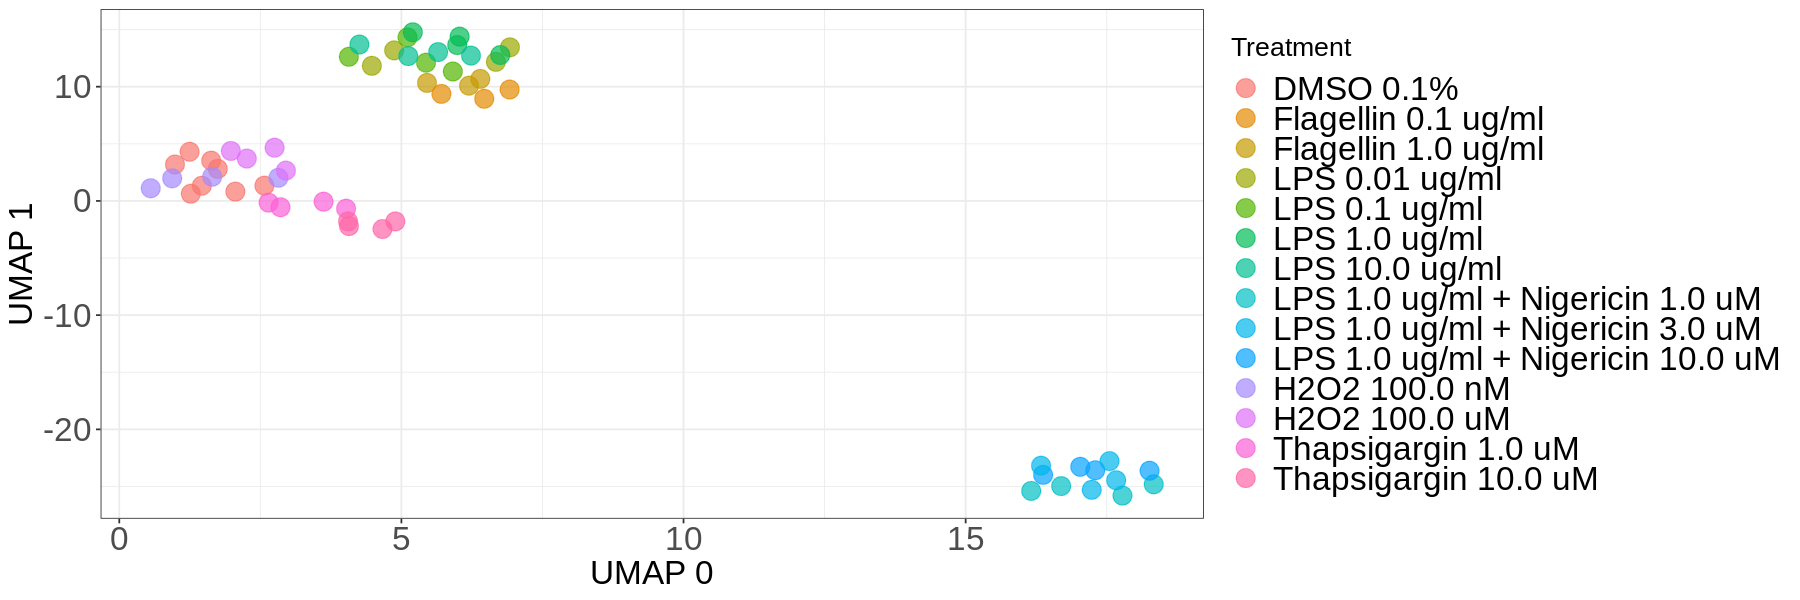

In [44]:
# set the plot size 
options(repr.plot.width=35, repr.plot.height=5)
# plot the umap results
umap_plot_all_treatments <- (
    ggplot(
        data = umap_results,
        aes(
            x = umap_1,
            y = umap_2,
            color = oneb_Treatment_Dose_Inhibitor_Dose
        )
    
    )
    + geom_point(size = 5, alpha = 0.7)
    + theme_bw()
    + labs(color = "Treatment", hjust = 0.5)
    + figure_theme
    + xlab("UMAP 0")
    + ylab("UMAP 1")
)
umap_plot_all_treatments

# set the plot size 
options(repr.plot.width=15, repr.plot.height=5)
# plot the umap results
umap_plot_selected_treatments <- (
    ggplot(
        data = umap_results_selected_treatments,
        aes(
            x = umap_1,
            y = umap_2,
            color = oneb_Treatment_Dose_Inhibitor_Dose
        )
    )
    + geom_point(size = 5, alpha = 0.7)
    + theme_bw()
    + labs(color = "Treatment", hjust = 0.5)
    + figure_theme
    + xlab("UMAP 0")
    + ylab("UMAP 1")
)
umap_plot_selected_treatments


## Path the plots  together 

In [45]:
# show the plots first as assigned names
# set plot size 
options(repr.plot.width=5, repr.plot.height=5)


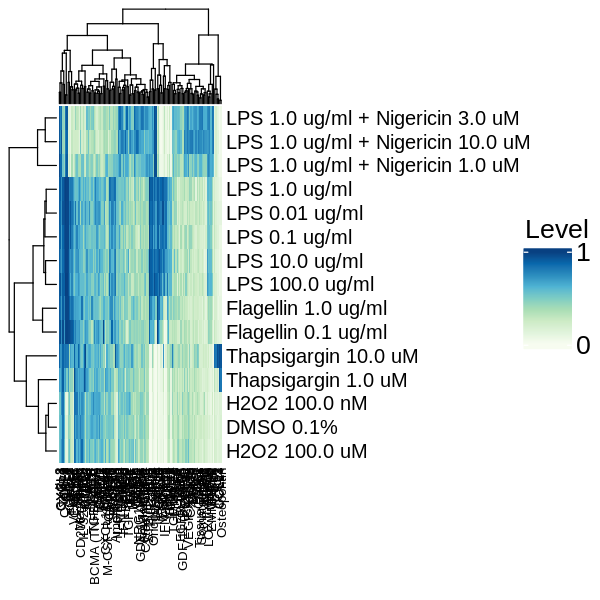

In [46]:
# Defien the heatmap as a ggplot heatmap for figure curation
new_heatmap <- as.ggplot(heatmap_anova_cytokines) 
# remove the legend for umap
umap_plot_selected_treatments <- umap_plot_selected_treatments + theme(legend.position = "none")
new_heatmap


In [47]:
# add padding to the bar plot
cytokine_bar_plot <- cytokine_bar_plot + theme(plot.margin = unit(c(2,0,0,0), "cm"))
# add padding to scatter plot
cytokine_scatter_plot <- cytokine_scatter_plot + theme(plot.margin = unit(c(2,0,0,0), "cm"))
# add padding to the umap
umap_plot_selected_treatments <- umap_plot_selected_treatments + theme(plot.margin = unit(c(2,2,0,2), "cm"))


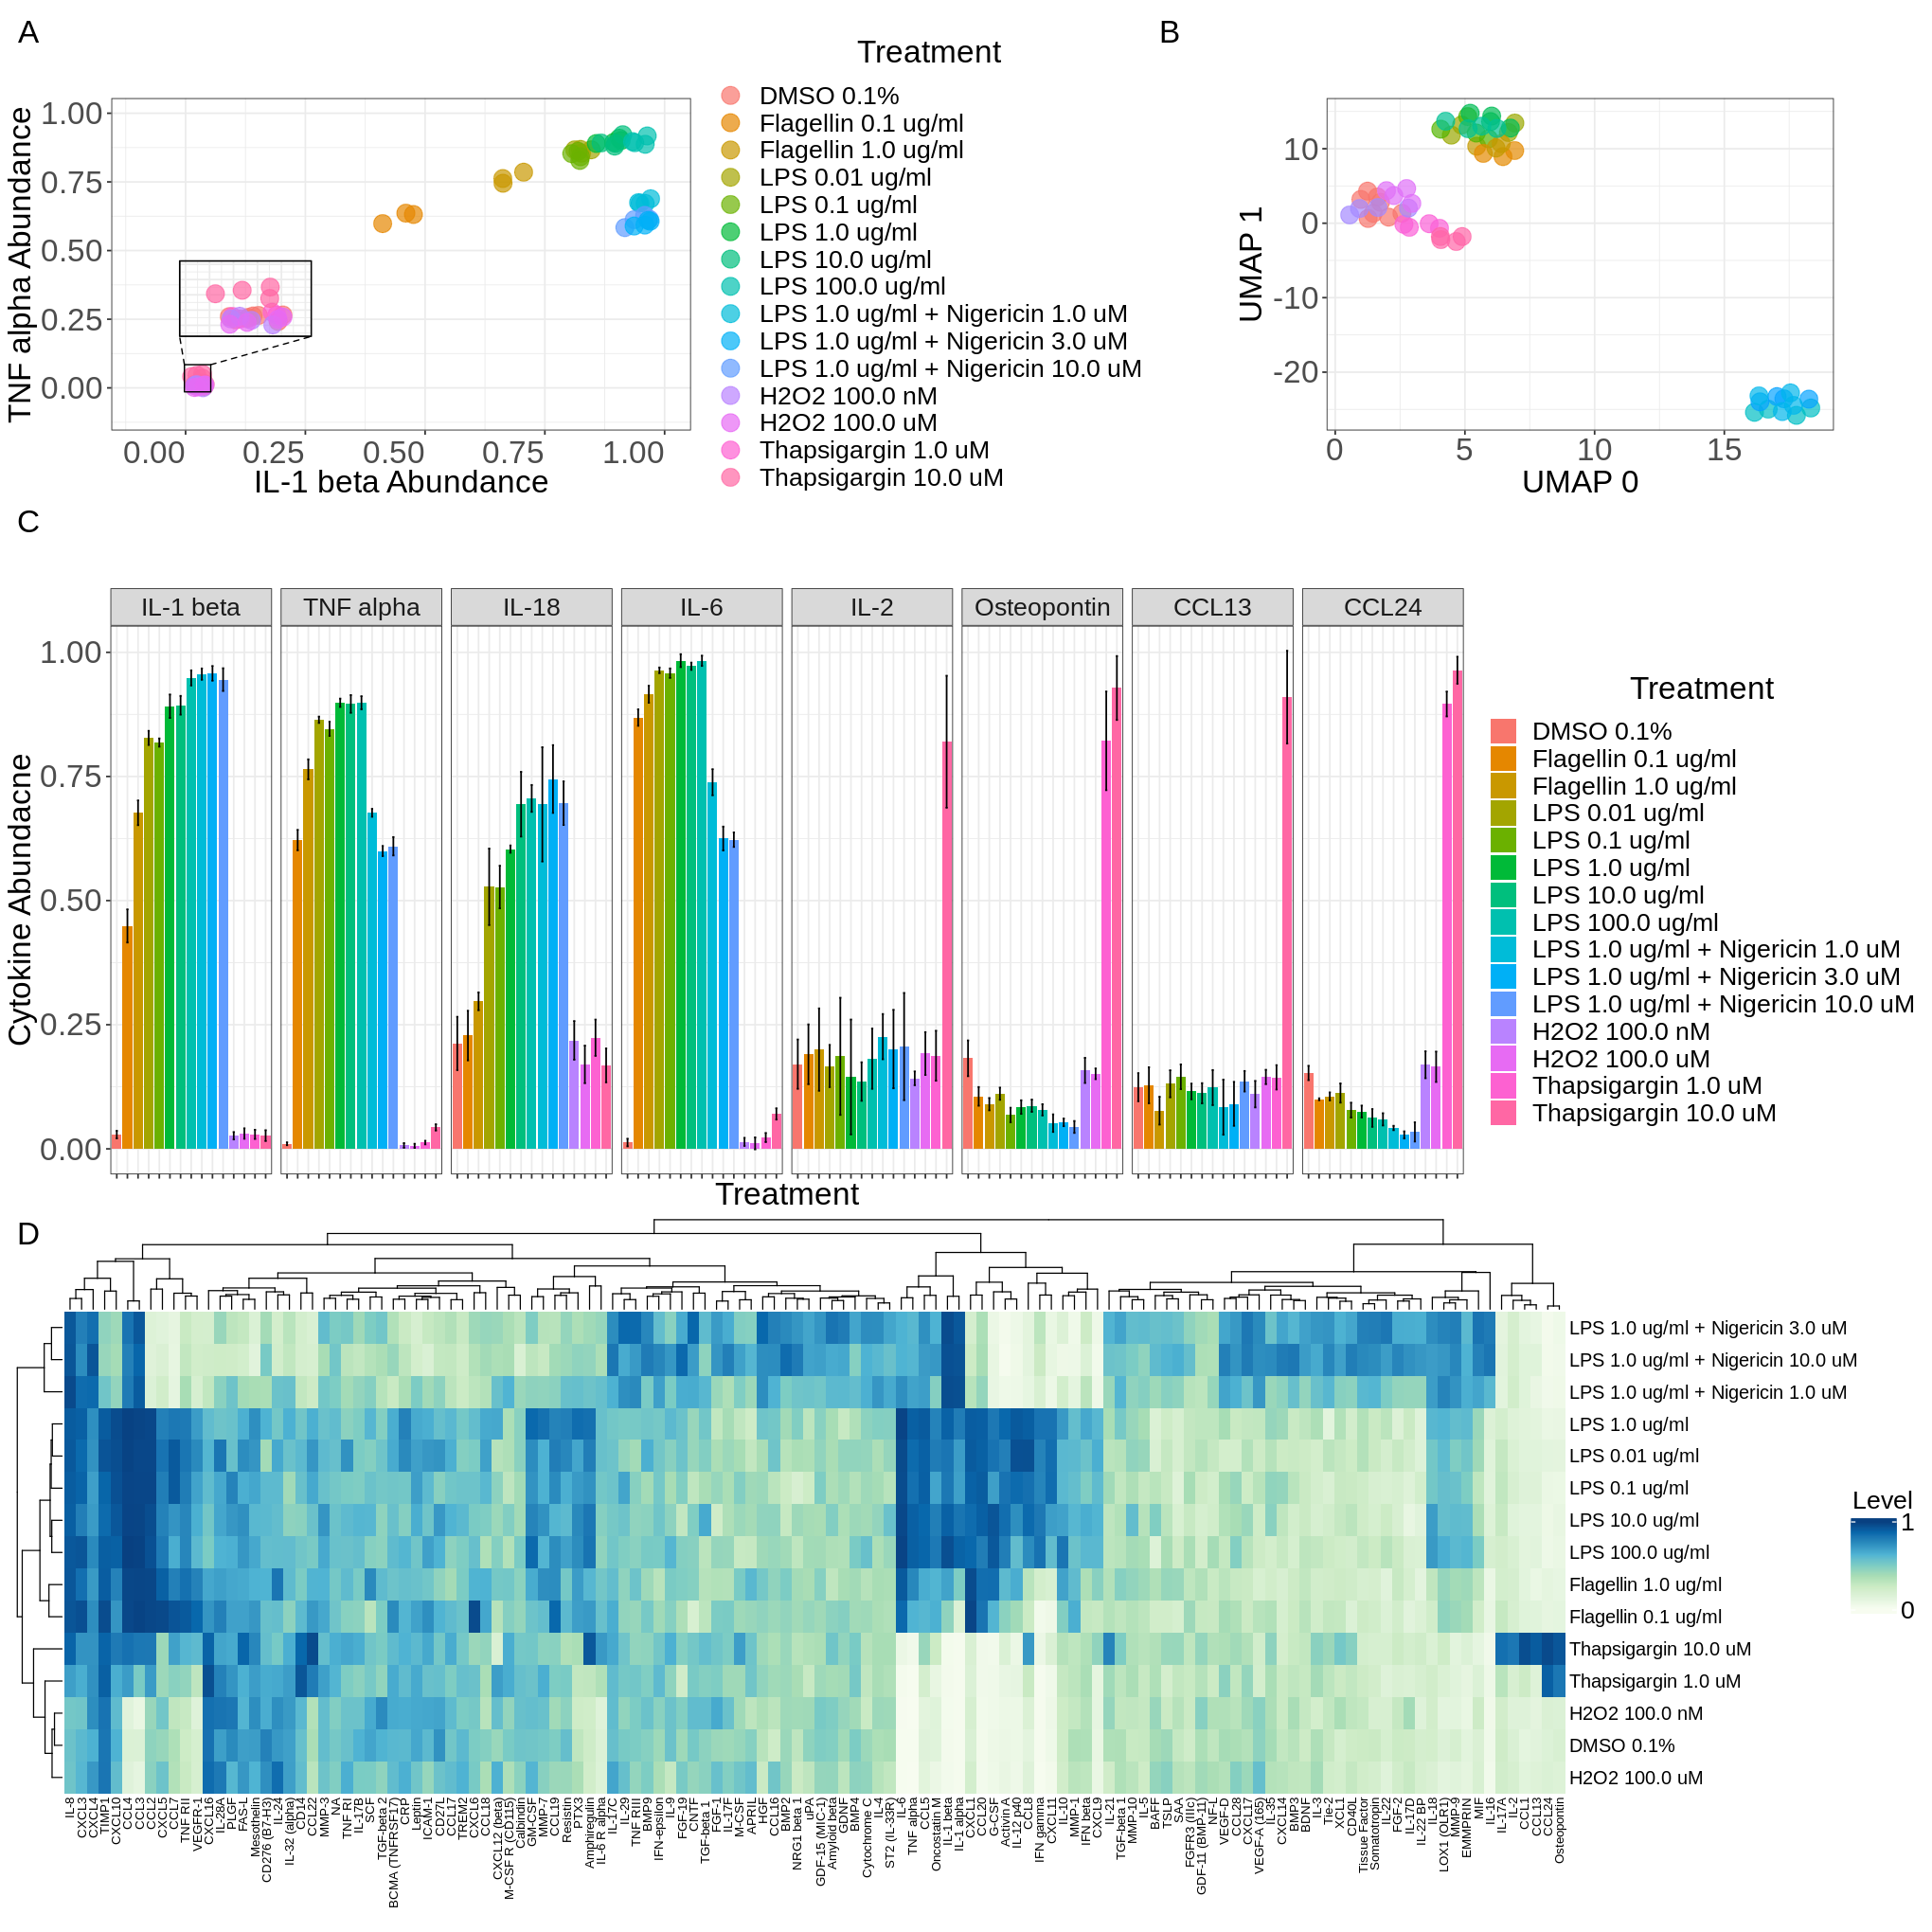

In [48]:
# set the design of the plots in the figure
# Where each letter represents a plot by order defined and the # represents a blank space
# each row represents a proportion of the total plot size
# some plots may be on multiple rows or columns
# plots can be proportioned by adding more letters to the row or column
design <-  "AABBCC
            AABBCC
            DDDDDD
            EEEEEE
            EEEEEE"
layout <- c(
    area(t=1, b=2, l=0, r=3), # A
    area(t=1, b=2, l=4, r=5), # B
    area(t=3, b=5, l=0, r=5), # C
    area(t=6, b=8, l=0, r=5) # D
)

# set plot size
width <- 17
height <- 17
options(repr.plot.width=width, repr.plot.height=height, units = "cm", dpi = 600)
fig2 <- (
    # wrap_elements(full = cytokine_scatter_plot1)
    wrap_elements(full = cytokine_scatter_plot)
    + wrap_elements(full = umap_plot_selected_treatments)
    # + cytokine_bar_plot 
    + wrap_elements(full = cytokine_bar_plot)
    # + new_heatmap
    + wrap_elements(full = new_heatmap)
    + plot_layout(design = layout, widths = c(), heights = c(),)
    + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 20))
)
fig2
ggsave(
    filename = file.path("figure2.png"),
    plot = fig2,
    width = 25,
    height = 20,
    units = "in",
    dpi = 600
)
